## Nombre: Franco Díaz
# Proyecto: ¿Cómo lograr el éxito rápido de un negocio de bicicletas compartidas?
## Última modificación: 15/02/2025
## Objetivo: El objetivo del proyecto es convertir la mayor cantidad posible de usuarios casuales de bicicletas en usuarios anuales.
## Escenario: Cyclistic es una empresa de bicicletas compartidas en Chicago. El plan es entender las diferencias entre ciclistas ocasionales y miembros anuales, con el fin de convertir a los primeros en los segundos. Lily Moreno, la directora de marketing, busca diseñar estrategias para aumentar las membresías anuales. Para ello, el equipo de análisis debe estudiar los datos históricos de los viajes de bicicletas y proporcionar recomendaciones basadas en estos. La tarea es respaldar las recomendaciones con visualizaciones profesionales y datos sólidos.
## Limitaciones: El conjunto de datos pertenece a una empresa real; por motivos de la licencia que otorga el curso Análisis de datos de Google, ciertos datos han sido cambiados u ocultos: El nombre de la empresa ha sido modificado y no se tiene acceso a datos que podrían identificar individuos (números de tarjetas de crédito, contacto y direcciones). 
## Para simplificar este documento, los cálculos, filtros, limpieza y normalización de datos se han realizado directamente desde el script sql relacionado a la base de datos que utilizaremos, por lo que solo presentaremos los gráficos y las conclusiones pertinentes.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
# import seaborn as sns

In [4]:
print(os.getcwd())  # Muestra el directorio actual

C:\Users\fesds\Notebooks\Caso_Bicicletas


In [12]:
os.chdir('C:\\Users\\fesds\\Notebooks\\Caso_Bicicletas\\')

## 1 Días de la semana más demandados

In [18]:
# Leer el archivo CSV con la codificación correcta
df = pd.read_csv('dias_populares.csv', encoding='utf-8')

# Guardar el archivo CSV con codificación UTF-8
df.to_csv('dias_populares_utf8.csv', index=False, encoding='utf-8')

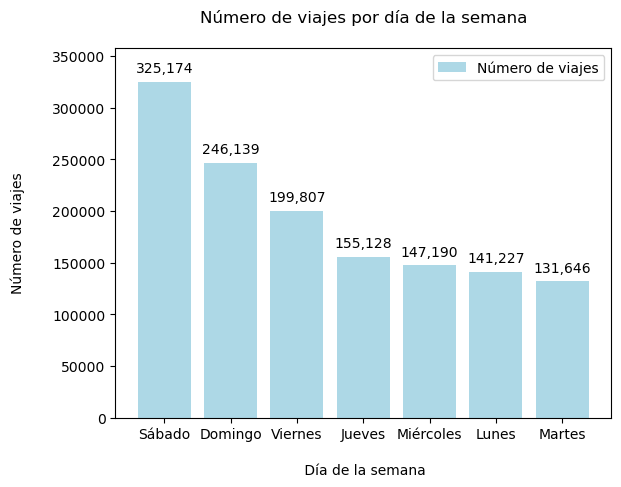

In [20]:
# Crear el gráfico de barras
plt.bar(df['day_of_week'], df['trip_count'], color='lightblue', label='Número de viajes')

# Añadir título y etiquetas
plt.title('Número de viajes por día de la semana\n')
plt.xlabel('\n Día de la semana')
plt.ylabel('Número de viajes', labelpad=20)

# Mostrar los números exactos en las barras
for i, value in enumerate(df['trip_count']):
    plt.text(i, value + 0.02 * max(df['trip_count']), f'{value:,}', ha='center', va='bottom')

# Ajustar los límites del eje Y para evitar que el texto choque con el borde
plt.ylim(0, max(df['trip_count']) * 1.1)  # Aumenta el límite superior en un 10%

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### Podemos notar una clara tendencia en que la mayor cantidad de viajes se producen los fines de semana, particularmente los días sábado.

## 2 Meses más comunes

In [22]:
# Leer el archivo con los datos
df_meses = pd.read_csv('meses_populares.csv', encoding='utf-8')

In [24]:
# consultar rápidamente la tabla
df_meses.head()

,mes,trip_count
0,Agosto,283006
1,Julio,268733
2,Septiembre,215300
3,Mayo,173526
4,Junio,154509


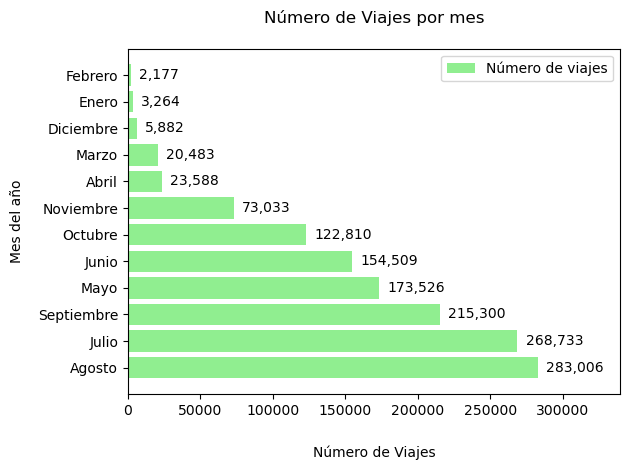

In [26]:
# Gráfico de barras horizontal
plt.barh(df_meses['mes'], df_meses['trip_count'], color='lightgreen', label='Número de viajes')

# Añadir título y etiquetas
plt.title('Número de Viajes por mes\n')
plt.ylabel('Mes del año', labelpad=10)
plt.xlabel('Número de Viajes', labelpad=20)

# Mostrar los números exactos en las barras
for i, value in enumerate(df_meses['trip_count']):
    plt.text(value + 0.02 * max(df_meses['trip_count']), i, f'{value:,}', va='center')

# Ajustar los límites del eje X
plt.xlim(0, max(df_meses['trip_count']) * 1.2)

# Mostrar la leyenda
plt.legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Notamos que los meses con más viajes se deben principalmente a los meses de vacaciones de verano (Agosto, Julio), mientras que el mes de Septiembre no se esperaba como un mes tan popular al no ser un mes de vacaciones, sin embargo, puede deberse al cambio en el clima y a la reducción del calor.



## 3 Número de viajes por horario

In [30]:
df_horas = pd.read_csv('horas_populares.csv')

In [32]:
df_horas.head()

,start_hour,trip_count
0,10,54309
1,11,75393
2,12,92080
3,13,100764
4,14,106180


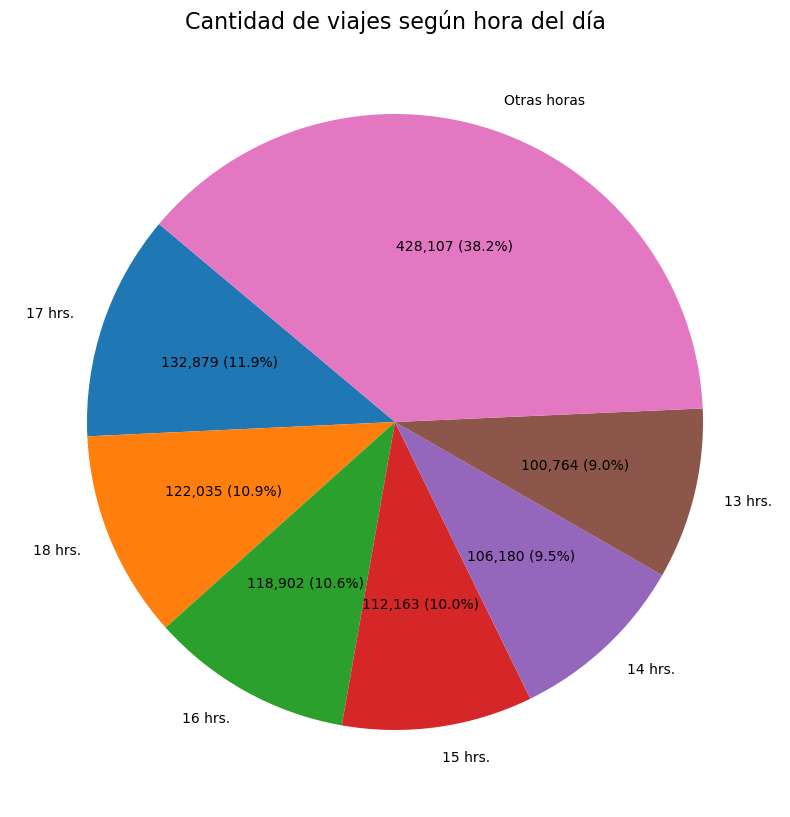

In [34]:
# Ordenar el DataFrame por 'trip_count' de mayor a menor
df_horas_sorted = df_horas.sort_values(by='trip_count', ascending=False)

# Separar las 6 horas con más viajes
top_6_horas = df_horas_sorted.head(6)

# Sumar las horas restantes
otras_horas = df_horas_sorted.iloc[6:]['trip_count'].sum()

# Crear una nueva fila para "Otras horas"
otras_horas_df = pd.DataFrame({'start_hour': ['Otras horas'], 'trip_count': [otras_horas]})

# Combinar las 6 horas más populares con "Otras horas"
df_grafico = pd.concat([top_6_horas, otras_horas_df], ignore_index=True)

# Agregar "hrs." a las etiquetas de las horas
labels = [f"{hora} hrs." if isinstance(hora, int) else hora for hora in df_grafico['start_hour']]

# Crear el gráfico de torta
plt.figure(figsize=(10, 10))  # Tamaño del gráfico
plt.pie(
    df_grafico['trip_count'],
    labels=labels,
    autopct=lambda p: f'{int(p * sum(df_grafico["trip_count"]) / 100):,} ({p:.1f}%)',  # Formato personalizado
    startangle=140
)

# Añadir título
plt.title('Cantidad de viajes según hora del día', fontsize=16)

# Mostrar el gráfico
plt.show()

### La mayor cantidad de viajes (61.8%) comienzan entre las 13 y 17 horas.


## 4 Lugares de inicio de viajes

In [38]:
df_inicios = pd.read_csv ('inicios_populares.csv')

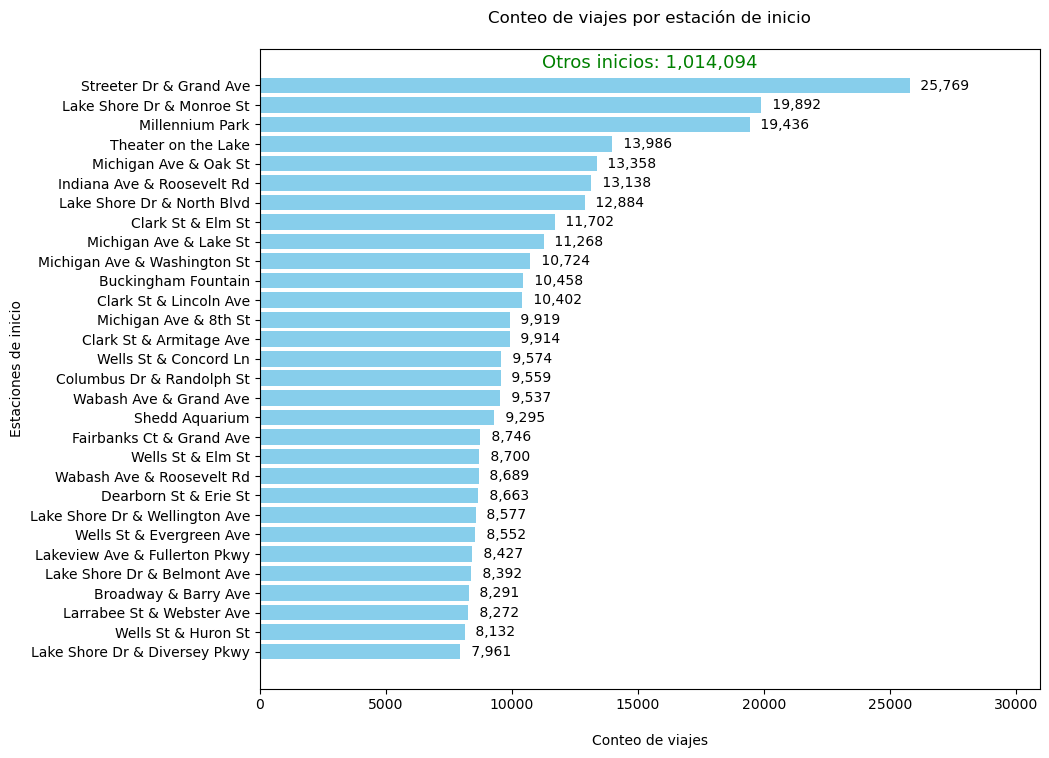

In [168]:
# 1. Filtrar "Otros inicios" del DataFrame principal
df_principal = df_inicios[df_inicios["inicio"] != "Otros inicios"]
otros_inicios = df_inicios[df_inicios["inicio"] == "Otros inicios"]

# 2. Ordenar el DataFrame principal por "station_count"
df_principal = df_principal.sort_values("station_count", ascending=True)

# 3. Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))  # Aumentar el ancho de la figura (12 de ancho)

# Gráfico de barras para el DataFrame principal
plt.barh(df_principal["inicio"], df_principal["station_count"], color="skyblue")

# Personalizar el gráfico
plt.xlabel("\nConteo de viajes")  # Etiqueta del eje X
plt.ylabel("Estaciones de inicio")  # Etiqueta del eje Y
plt.title("Conteo de viajes por estación de inicio\n")  # Título del gráfico

# Desactivar la notación científica en el eje X
plt.ticklabel_format(axis="x", style="plain")  # Evita que aparezca 1e6

# Ajustar el límite del eje X para dar más espacio a las etiquetas
max_value = df_principal["station_count"].max()  # Valor máximo
plt.xlim(0, max_value * 1.2)  # Aumentar el límite del eje X en un 20%

# Añadir etiquetas de valores fuera de las barras
for i, value in enumerate(df_principal["station_count"]):
    plt.text(
        value + (0.01 * max_value),  # Posición horizontal (fuera de la barra)
        i,  # Posición vertical (centrada en la barra)
        f" {value:,}",  # Texto con separadores de miles
        va="center",  # Alineación vertical
        fontsize=10,
        color="black",
        ha="left",  # Alineación horizontal (a la izquierda fuera de la barra)
    )

# Añadir una anotación para "Otros inicios"
plt.annotate(
    f"Otros inicios: {otros_inicios['station_count'].values[0]:,}",
    xy=(0.5, 0.97),  # Posición de la anotación (en coordenadas relativas)
    xycoords="axes fraction",  # Usar coordenadas relativas al gráfico
    fontsize=13,
    color="green",
    ha="center",  # Alineación horizontal
)

# Ajustar los márgenes manualmente
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)  # Ajustar márgenes

# 4. Mostrar el gráfico
plt.show()

### A pesar de que la mayoría de viajes se encuentran en "otros destinos", debemos tener en cuenta la cantidad de calles, por lo que el criterio para seleccionar los inicios más populares fueron inicios que tuvieran más de 7500 viajes. Sumando en total 332.217 viajes, los inicios más comunen constituyen aproximadamente el 25% del total de viajes.

## 5 Lugares de destino de viajes 

In [163]:
df_destinos = pd.read_csv ('destinos_populares.csv')

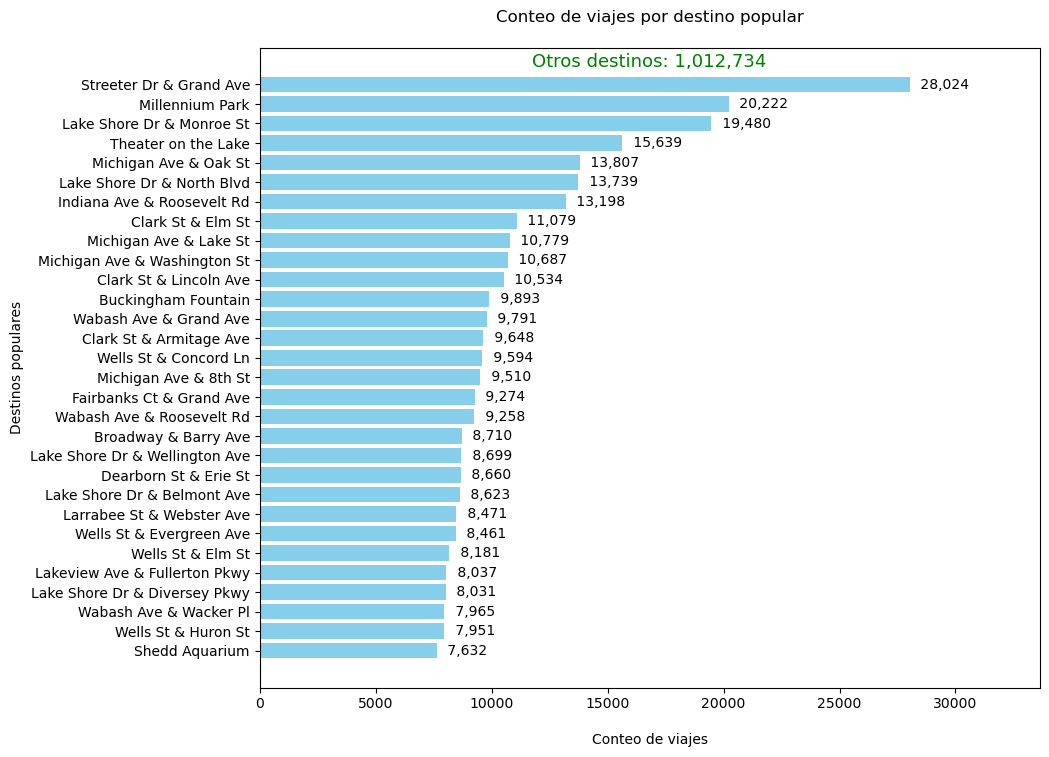

In [171]:
# 1. Filtrar "Otros destinos" del DataFrame principal (si existe)
df_principal_destinos = df_destinos[df_destinos["destino"] != "Otros destinos"]
otros_destinos = df_destinos[df_destinos["destino"] == "Otros destinos"]

# 2. Ordenar el DataFrame principal por "station_count"
df_principal_destinos = df_principal_destinos.sort_values("station_count", ascending=True)

# 3. Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))  # Aumentar el ancho de la figura (12 de ancho)

# Gráfico de barras para el DataFrame principal
plt.barh(df_principal_destinos["destino"], df_principal_destinos["station_count"], color="skyblue")

# Personalizar el gráfico
plt.xlabel("\nConteo de viajes")  # Etiqueta del eje X
plt.ylabel("Destinos populares")  # Etiqueta del eje Y
plt.title("Conteo de viajes por destino popular\n")  # Título del gráfico

# Desactivar la notación científica en el eje X
plt.ticklabel_format(axis="x", style="plain")  # Evita que aparezca 1e6

# Ajustar el límite del eje X para dar más espacio a las etiquetas
max_value_destinos = df_principal_destinos["station_count"].max()  # Valor máximo
plt.xlim(0, max_value_destinos * 1.2)  # Aumentar el límite del eje X en un 20%

# Añadir etiquetas de valores fuera de las barras
for i, value in enumerate(df_principal_destinos["station_count"]):
    plt.text(
        value + (0.01 * max_value_destinos),  # Posición horizontal (fuera de la barra)
        i,  # Posición vertical (centrada en la barra)
        f" {value:,}",  # Texto con separadores de miles
        va="center",  # Alineación vertical
        fontsize=10,
        color="black",
        ha="left",  # Alineación horizontal (a la izquierda fuera de la barra)
    )

# Añadir una anotación para "Otros destinos" (si existe)
if not otros_destinos.empty:
    plt.annotate(
        f"Otros destinos: {otros_destinos['station_count'].values[0]:,}",
        xy=(0.5, 0.97),  # Posición de la anotación (en coordenadas relativas)
        xycoords="axes fraction",  # Usar coordenadas relativas al gráfico
        fontsize=13,
        color="green",
        ha="center",  # Alineación horizontal
    )

# Ajustar los márgenes manualmente
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)  # Ajustar márgenes

# 4. Mostrar el gráfico
plt.show()

### Como en el caso anterior, "otros destinos" también es mucho mayor a los principales, sin embargo, los destinos más populares también son aproximadamente un 25% del total de los viajes; para este caso también se aplicó el criterio de destinos con más de 7500 viajes, contemplando 30 valores tanto en inicios como destinos.

## 6 Rutas más comunes realizadas

In [181]:
df_rutas = pd.read_csv ('rutas_populares.csv')

,ruta,ruta_count
0,Streeter Dr & Grand Ave - Streeter Dr & Grand Ave,6192
1,Lake Shore Dr & Monroe St - Lake Shore Dr & Mo...,5959
2,Millennium Park - Millennium Park,5257
3,Buckingham Fountain - Buckingham Fountain,5095
4,Indiana Ave & Roosevelt Rd - Indiana Ave & Roo...,3887


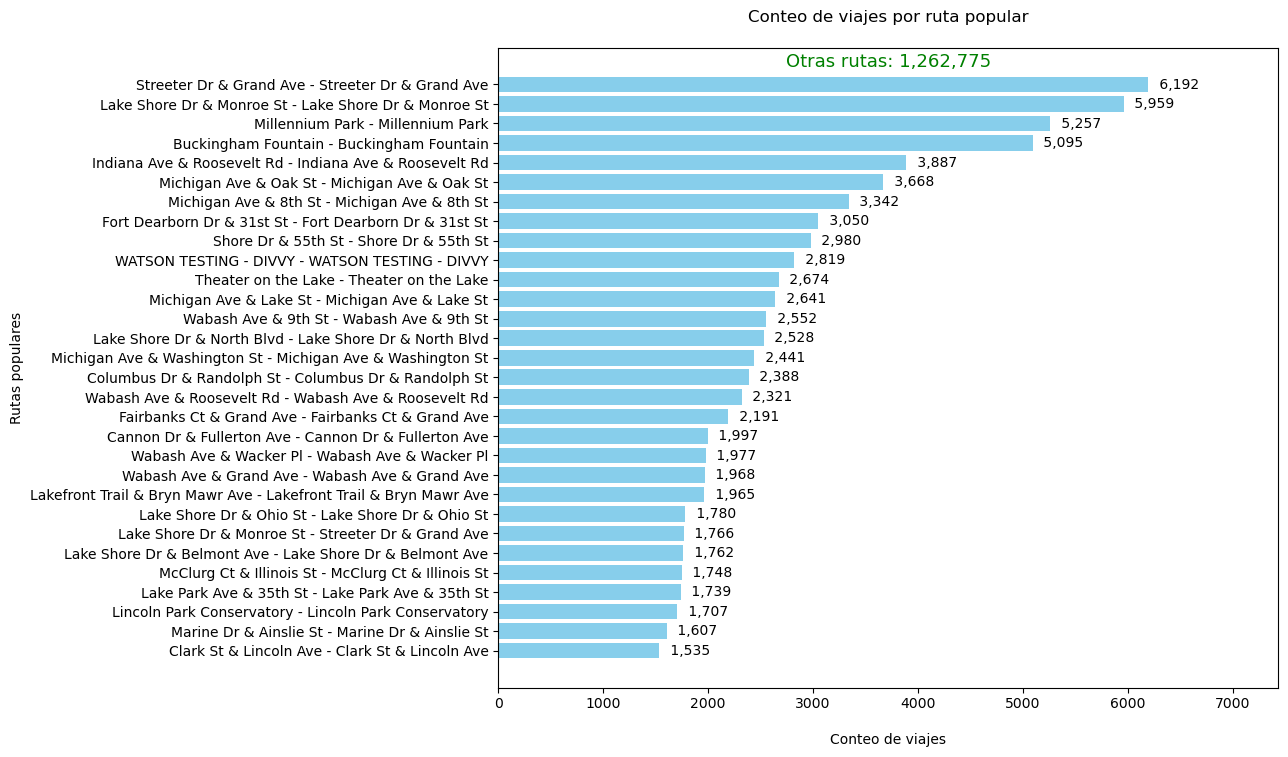

In [191]:
import matplotlib.pyplot as plt

# 1. Filtrar "Otras rutas" del DataFrame principal (si existe)
df_principal_rutas = df_rutas[df_rutas["ruta"] != "Otras rutas"]
otras_rutas = df_rutas[df_rutas["ruta"] == "Otras rutas"]

# 2. Ordenar el DataFrame principal por "ruta_count"
df_principal_rutas = df_principal_rutas.sort_values("ruta_count", ascending=True)

# 3. Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))  # Aumentar el ancho de la figura (12 de ancho)

# Gráfico de barras para el DataFrame principal
plt.barh(df_principal_rutas["ruta"], df_principal_rutas["ruta_count"], color="skyblue")

# Personalizar el gráfico
plt.xlabel("\nConteo de viajes")  # Etiqueta del eje X
plt.ylabel("Rutas populares")  # Etiqueta del eje Y
plt.title("Conteo de viajes por ruta popular\n")  # Título del gráfico

# Desactivar la notación científica en el eje X
plt.ticklabel_format(axis="x", style="plain")  # Evita que aparezca 1e6

# Ajustar el límite del eje X para dar más espacio a las etiquetas
max_value_rutas = df_principal_rutas["ruta_count"].max()  # Valor máximo
plt.xlim(0, max_value_rutas * 1.2)  # Aumentar el límite del eje X en un 20%

# Añadir etiquetas de valores fuera de las barras
for i, value in enumerate(df_principal_rutas["ruta_count"]):
    plt.text(
        value + (0.01 * max_value_rutas),  # Posición horizontal (fuera de la barra)
        i,  # Posición vertical (centrada en la barra)
        f" {value:,}",  # Texto con separadores de miles
        va="center",  # Alineación vertical
        fontsize=10,
        color="black",
        ha="left",  # Alineación horizontal (a la izquierda fuera de la barra)
    )

# Añadir una anotación para "Otras rutas" (si existe)
if not otras_rutas.empty:
    plt.annotate(
        f"Otras rutas: {otras_rutas['ruta_count'].values[0]:,}",
        xy=(0.5, 0.97),  # Posición de la anotación (en coordenadas relativas)
        xycoords="axes fraction",  # Usar coordenadas relativas al gráfico
        fontsize=13,
        color="green",
        ha="center",  # Alineación horizontal
    )

# Ajustar los márgenes manualmente
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)  # Ajustar márgenes

# 4. Mostrar el gráfico
plt.show()

### Si bien las rutas más comunes solo contemplan un 6% del total, es un porcentaje considerable debido a la cantidad de combinaciones posibles tanto para inicios como destinos, también podemos observar en su mayoría rutas con orientación Norte-Sur.

## 7 Mapa de inicio de rutas

In [7]:
df_mapa_in = pd.read_csv ('mapa_inicios.csv')

In [7]:
df_mapa_in.head()

,inicio,trip_count_in,start_lat,start_lng
0,Rush St & Hubbard St,2647,41.8909,-87.6252
1,Ogden Ave & Roosevelt Rd,531,41.8666,-87.6844
2,LaSalle Dr & Huron St,4168,41.8960,-87.6316
3,Leavitt St & Archer Ave,424,41.8288,-87.6806
4,Clark St & Lincoln Ave,10402,41.9160,-87.6345


In [98]:

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Añadir círculos al mapa
for index, row in df_mapa_in.iterrows():
    folium.Circle(
        location=[row['start_lat'], row['start_lng']],  # Coordenadas de la pelota
        radius=row['trip_count_in'] * 0.01,             # Tamaño de la pelota (ajusta el factor 0.5 según sea necesario)
        color='blue',                                  # Color del borde de la pelota
        fill=True,                                     # Rellenar la pelota
        fill_color='blue',                             # Color de relleno de la pelota
        fill_opacity=0.4,                              # Opacidad del relleno
        popup=f"{row['inicio']}: {row['trip_count_in']} viajes"  # Etiqueta con nombre y viajes
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
# mapa.save("mapa_circulos_azules.html")

# Mostrar el mapa
# Al hacer clic en los círculos se muestra la cantidad exacta de viajes
mapa

### Podemos notar que la gran mayoría de rutas se inician en la zona centro-este de la ciudad, en las cercanías de Millennium Park y "loop", el distrito central de negocios de Chicago

## 8 Mapa de destino de rutas 

In [87]:
df_mapa_des = pd.read_csv ('mapa_destinos.csv')

In [94]:
df_mapa_des.head()

,destino,trip_count_des,end_lat,end_lng
0,Sheridan Rd & Lawrence Ave,1802,41.9695,-87.6547
1,Western Ave & Congress Pkwy,1045,41.8747,-87.6864
2,Larrabee St & Division St,3392,41.9035,-87.6434
3,Leavitt St & Archer Ave,440,41.8288,-87.6806
4,Southport Ave & Wrightwood Ave,2812,41.9288,-87.6639


In [96]:
# Crear un mapa centrado en una ubicación inicial
mapa_destinos = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Añadir círculos al mapa
for index, row in df_mapa_des.iterrows():
    folium.Circle(
        location=[row['end_lat'], row['end_lng']],  # Coordenadas de la pelota
        radius=row['trip_count_des'] * 0.01,             # Tamaño de la pelota (ajusta el factor 0.5 según sea necesario)
        color='green',                                  # Color del borde de la pelota
        fill=True,                                     # Rellenar la pelota
        fill_color='green',                             # Color de relleno de la pelota
        fill_opacity=0.4,                              # Opacidad del relleno
        popup=f"{row['destino']}: {row['trip_count_des']} viajes"  # Etiqueta con nombre y viajes
    ).add_to(mapa_destinos)

# Guardar el mapa en un archivo HTML
# mapa.save("mapa_destinos.html")

# Mostrar el mapa
# Al hacer clic en los círculos se muestra la cantidad exacta de viajes
mapa_destinos

### Podemos apreciar que la tendencia de los destinos es parecida, sin embargo, en dirección hacia el norte también posee una cantidad importante de finalizaciones de viajes.

## 9 Rutas recorridas por los ciclistas

In [6]:
df_mapa_rutas = pd.read_csv('mapa_rutas.CSV')

In [8]:
df_mapa_rutas.head()

,ruta,trip_count,start_lat,start_lng,end_lat,end_lng
0,Streeter Dr & Grand Ave-Streeter Dr & Grand Ave,6192,41.8921,-87.6124,41.8921,-87.6470
1,Lake Shore Dr & Monroe St-Lake Shore Dr & Monr...,5959,41.8809,-87.6168,41.8808,-87.6169
2,Millennium Park-Millennium Park,5257,41.8810,-87.6242,41.8808,-87.6243
3,Buckingham Fountain-Buckingham Fountain,5095,41.8763,-87.6205,41.8708,-87.6205
4,Indiana Ave & Roosevelt Rd-Indiana Ave & Roose...,3887,41.8677,-87.6231,41.8678,-87.6233


In [14]:

# Seleccionar los 25 viajes más comunes
df_mapa_rutas = df_mapa_rutas.nlargest(25, 'trip_count')

# Crear un mapa centrado en el promedio de las coordenadas de inicio
mapa = folium.Map(
    location=[df_mapa_rutas['start_lat'].mean(), df_mapa_rutas['start_lng'].mean()],
    zoom_start=12
)

# Definir colores
color_inicio = 'blue'       # Círculo azul para el inicio
color_fin = 'green'         # Círculo verde para el fin
color_linea = 'red'         # Línea roja para la ruta (más visible)

# Función para normalizar el tamaño de los círculos según el trip_count
def normalizar_tamano(trip_count, min_size=3, max_size=10):  # Ajustamos el tamaño máximo
    return min_size + (max_size - min_size) * (trip_count / df_mapa_rutas['trip_count'].max())

# Añadir las rutas al mapa
for _, row in df_mapa_rutas.iterrows():
    # Coordenadas de inicio y fin
    inicio = (row['start_lat'], row['start_lng'])
    fin = (row['end_lat'], row['end_lng'])
    
    # Añadir línea que conecta inicio y fin
    folium.PolyLine(
        locations=[inicio, fin],  # Coordenadas de la línea
        color=color_linea,       # Color de la línea
        weight=3,                # Grosor de la línea (aumentado para mayor visibilidad)
        opacity=0.8              # Transparencia de la línea (reducida para mayor visibilidad)
    ).add_to(mapa)
    
    # Añadir círculo en el punto de inicio
    folium.Circle(
        location=inicio,
        radius=normalizar_tamano(row['trip_count']) * 10,  # Reducimos el factor de multiplicación
        color=color_inicio,
        fill=True,
        fill_color=color_inicio,
        fill_opacity=0.6,
        popup=f"Inicio: {row['ruta']}, Viajes: {row['trip_count']}"
    ).add_to(mapa)
    
    # Añadir círculo en el punto de fin
    folium.Circle(
        location=fin,
        radius=normalizar_tamano(row['trip_count']) * 10,  # Reducimos el factor de multiplicación
        color=color_fin,
        fill=True,
        fill_color=color_fin,
        fill_opacity=0.6,
        popup=f"Fin: {row['ruta']}, Viajes: {row['trip_count']}"
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('mapa_rutas_top25.html')

# Mostrar el mapa en una ventana del navegador
import webbrowser
webbrowser.open('mapa_rutas_top25.html')

True

### Debido a cargas excesivas de información, el mapa de rutas se ajustó a las 25 más seguidas, lo que confirma gráficamente que la mayor cantidad de viajes poseen una dirección norte-sur

## Conclusiones

### Del análisis realizado anteriormente podemos determinar claramente y con precisión las tendencias y costumbres seguidas por los usuarios casuales de bicicletas, lo que nos otorga una base sólida para que el equipo de marketing, para el cual fue diseñado este análisis, pueda desarrollar de manera estratégica un plan para ofrecer membresías anuales a los ciclistas de una manera estratégica.

### Sugerencias: 

#### Dado que no se conoce la opinión de ciclistas casuales ni podemos identificarlos personalmente, (lo que permitiría calcular el gasto que realizan por viaje versus lo que gastarían al pagar una membresía) se recomienda realizar encuestas a dichos clientes, a modo de conocer con mayor detalle sus preferencias, se recomienda además ofrecer la posibilidad de servicios adicionales como: servicio técnico, asesoramiento, entre otras. Lo que haría mucho más llamativa una suscripción; por último, los esfuerzos en realizar marketing de manera local deberían estar orientados hacia la zona centro-norte de la ciudad de Chicago, ya sea directamente en las estaciones o mediante uso de publicidad.
